# Сервис аренды самокатов

Необходимо проверить некоторые гипотезы и ответить на вопрос, являются ли пользователи с подпиской более выгодными для компании (приносят ли они больше выручки), чем пользователи без подписки.

В распоряжении данные о пользователях, типах и условиях подписки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from math import sqrt
from scipy.stats import binom, norm
from math import factorial

sns.set(rc={'figure.figsize':(10,7)})

#### Шаг 1. Загрузка данных

In [2]:
dt_users = pd.read_csv('/datasets/users_go.csv')

dt_rides = pd.read_csv('/datasets/rides_go.csv')

dt_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
dt_users.head(30)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
dt_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
dt_rides.head(30)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
dt_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
dt_subscriptions.head(30)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
dt_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


##### Вывод
- Произвелась выгрузка данных. Был проведен просмотр основной информации о них.
- Столбец date в таблице dt_rides необходимо привести к формату datetime.
- Пропуски в данных отсутствуют

#### Шаг 2. Предобработка данных

##### Сделаем преобразование и добавим новый столбец с номером месяца

In [9]:
# преобразуем столбец date в датасете dt_rides к формату datetime
dt_rides['date'] = pd.to_datetime(dt_rides['date'], format='%Y-%m-%d')

dt_rides.info() # проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [10]:
dt_rides['date'].dt.year.unique() # проверим, за какие года у нас есть данные

array([2021])

In [11]:
# данные представлены только за один год
# добавим в данные столбец с номером месяца
dt_rides['month'] = dt_rides['date'].dt.month

dt_rides.head(10) # проверим

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


##### Наличие пропусков

In [12]:
# необходимо проверить данные на наличие пропусков

display(dt_users.isna().sum())

display(dt_rides.isna().sum())

display(dt_subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В таблицах пропуски отсутствуют.

##### Наличие дубликатов

In [13]:
# далее проверим датасеты на наличие дубликатов
display(dt_users.duplicated().sum())

display(dt_rides.duplicated().sum())

display(dt_subscriptions.duplicated().sum())

31

0

0

In [14]:
# только в таблице с данными о пользователях есть дубликаты 
# удалим повторяющиеся строки
dt_users.drop_duplicates(inplace=True)

dt_users.duplicated().sum() # проверим

0

In [15]:
# также следует проверить стобец с названием города из таблицы dt_users на наличие неявных дубликатов

# выведем уникальные значения данного столбца
dt_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты отсутствуют.

##### Аномальные значения (выбросы)

In [16]:
# посмотрим на основные параметры датафреймов, чтобы оценить наличие выбросов
display(dt_users.describe())

display(dt_rides.describe())

display(dt_subscriptions.describe())

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Аномальные значения в данных отсутствуют.

##### Вывод
- В данных пропуски отсутствуют.
- В таблице dt_users присутствовали дубликаты. Они были удалены.
- Аномальные значения в данных отсутствуют.
- Также к формату datetime был приведен столбец date из dt_rides и добавлен столбец month с номером месяца.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

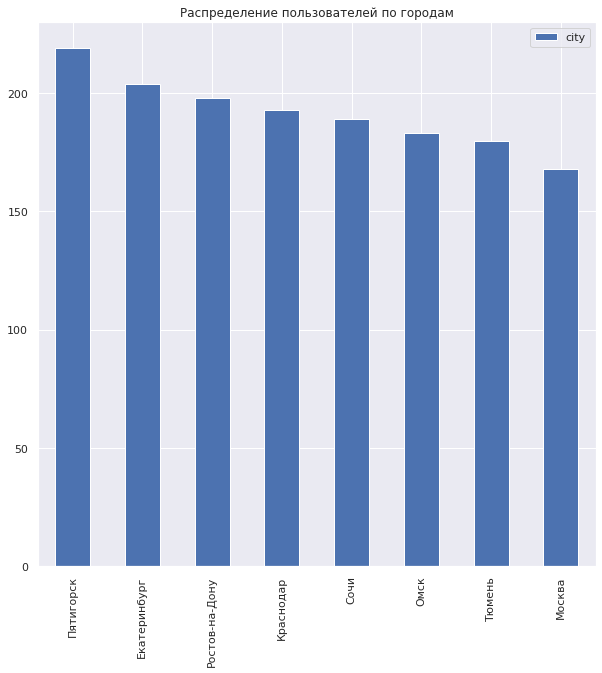

In [17]:
# посмотрим на распределение по городам
# построим график
dt_users['city'].value_counts().plot.bar(figsize=(10, 10), legend=True, grid=True)
plt.title('Распределение пользователей по городам')
plt.show()

In [18]:
dt_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

В целом, по городам пользователи распределены равномерно. Только лишь падает значение в области Москвы и пик в области Пятигорска. Пользователи распределились по городам в диапазоне от 169 до 219.

##### Соотношение пользователей с подпиской и без подписки

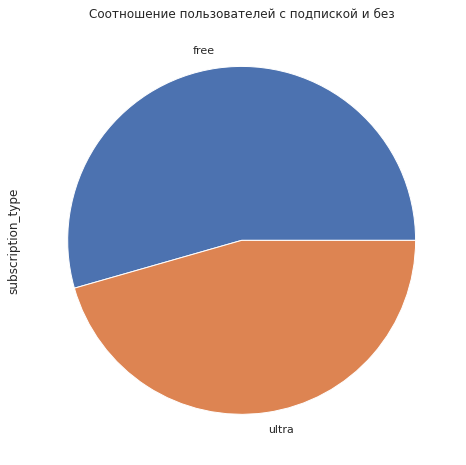

In [19]:
# построим гистограмму для типа подписки, необходимо посмотреть каких пользователей больше
dt_users['subscription_type'].value_counts().plot(kind='pie', figsize=(8, 8))
plt.title('Соотношение пользователей с подпиской и без')
plt.show()

Пользователей без подписки больше, но ненамного.

In [20]:
# посмотрим как распределются пользователи с подпиской и без в процентном соотношении
sub_perc = dt_users['subscription_type'].value_counts()
display(round(dt_users['subscription_type'].value_counts() / sub_perc.sum(), 2) * 100)

free     54.0
ultra    46.0
Name: subscription_type, dtype: float64

Как мы видим, пользователей без подписки примерно 54%, а с подпиской - 46%.

##### Возраст пользователей

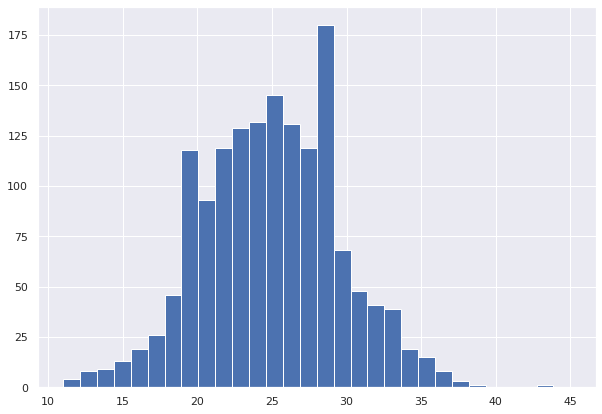

In [21]:
# посмотрим, как распределяется возраст среди пользователей
# построим для этого гистограмму
dt_users['age'].hist(bins=30, range=(11,45))
plt.show()

In [22]:
# также посмотрим на медиану и среднее
print('Среднее равно', dt_users['age'].mean()) # среднее
print('Медиана равна', dt_users['age'].median()) # медиана

Среднее равно 24.903520208604956
Медиана равна 25.0


Возраст колеблется от 12 до 43 лет. Большинство пользователей имеют возраст от 19 до 29 лет.

Медианное значение равно 25, а среднее 24.9. Они, по сути, равны, что говорит нам о том, что выбросов нет.

##### Расстояние, которое пользователь преодолел за одну поездку

<AxesSubplot:>

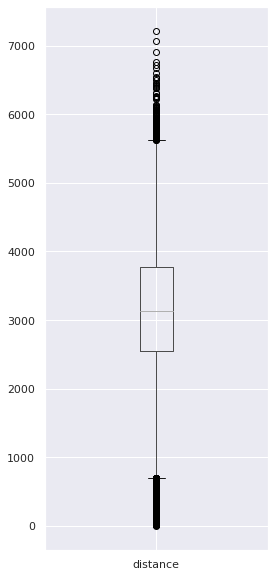

In [23]:
# построим график размаха дистанций, которое преодолевали пользователи
dt_rides.boxplot(column='distance', grid=True, figsize=(4, 10))

<AxesSubplot:>

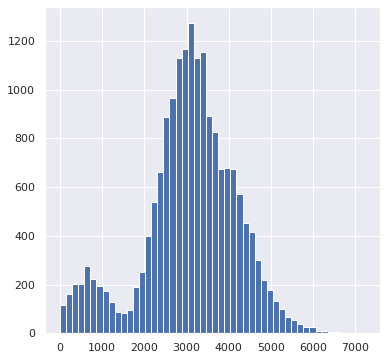

In [24]:
# также построим гистограмму
dt_rides['distance'].hist(bins=50, grid=True, figsize=(6, 6))

In [25]:
# изучим столбец distance из датафрейма dt_rides подробнее
dt_rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


Большинство пользователей проезжают на арендованом самокате расстояние в диапазон от 2500 м до 3800 м. 

Есть пользователи, которые проезжают совсем небольшие расстояния. Думаю, это может быть связано либо с тем, что некоторые пользователи берут самокат в аренду, а у них не получается на нём ездить, либо с тем, что пользователи не могут где-то проехать, либо с технической проблемой в самом самокате.

Есть пользователи, которые проезжают дистанцию более 5500 м.

На гистограмме заметны два пика: в области 600-700 м и в области 3200 м. 

В целом, поездки можно разделить на длительные (более 2000 м) и короткие (менее 2000 м).

##### Продолжительность поездки

<AxesSubplot:>

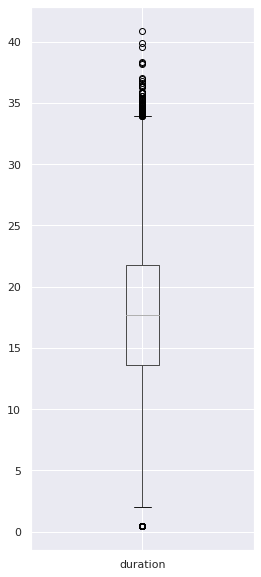

In [26]:
# построим график размаха продолжительности поездки
dt_rides.boxplot(column='duration', grid=True, figsize=(4, 10))

In [27]:
# рассмотрим поездки длительностью менее 1 минуты
rides_small = dt_rides.query('duration <= 1')
rides_small.reset_index(drop= True , inplace= True )
display(rides_small.tail(5))

,user_id,distance,duration,date,month
90,1460,5531.335845,0.5,2021-01-19,1
91,1477,6724.932981,0.5,2021-01-12,1
92,1483,4445.481070,0.5,2021-03-06,3
93,1496,5722.551787,0.5,2021-02-14,2
94,1524,4103.998874,0.5,2021-06-18,6


<AxesSubplot:>

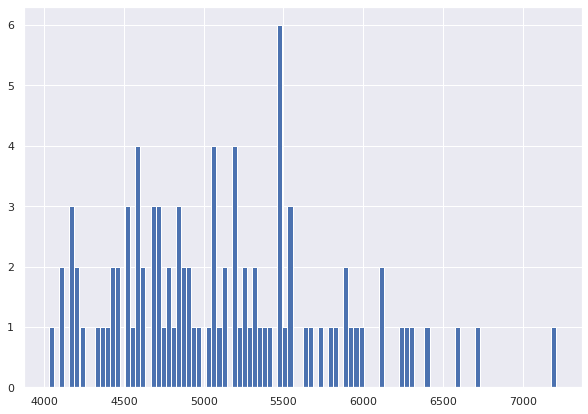

In [28]:
# посторим гистограмму
rides_small['distance'].hist(bins=100)

Интересно то, что все поездки длительносьбю менее 1 минуты имеют расстояние поездки более 4 км.. Скорее всего, ошибка приложени или ошибка при выгрузке/загрузке/сохранении данных. Удалим эти строки в исходных данных.

In [29]:
print('Строк в исходной таблице:', len(dt_rides))
dt_rides = dt_rides.loc[dt_rides['duration'] > 1]
dt_rides.reset_index(drop= True , inplace= True )
print('Строк в обновленной таблице:', len(dt_rides))

Строк в исходной таблице: 18068
Строк в обновленной таблице: 17973


В целом, большинство пользователей берут самокат в аренду на длительность от 14 до 22 минут.

Есть клиенты, использующие самокаты достаточно долго - более получаса за одну поездку.

##### Вывод
Проведя анализ данных, были сделаны следующие выводы:
- Наиболее часто встречающийся город среди пользователей - Пятигорск, наименее - Москва.
- Пользователей без подписки больше, их доля составляет 54%. Без подписки - 46%, соответственно.
- Самому младшему пользователю 12 лет, самому старшему - 43 года. Большинство клиентов имеют возраст от 19 до 29 лет.
- Самая короткая по расстоянию поездка - 0.86 м, самая длинная - более 7 км. Чаще всего на самокате за одну поездку проезжают 2500-3800 м.
- Самая длительная поездка - 40 минут, самая короткая - менее минуты. Чаще всего за одну поездку самокат находится в действии от 14 до 22 минут.
- Слишком короткие поездки по расстоянию и по продолжительности, скорее всего, связаны либо с технической проблемой в самом самокате, либо с тем, что пользователь передумал ехать.

#### Шаг 4. Объединение данных

##### Объединение данных

In [30]:
# объеденим наши данные в одну таблицу
data = dt_users.merge(dt_rides) # сначала объеденим таблицы dt_users и dt_rides

data = data.merge(dt_subscriptions) # затем присоеденим третью таблицу

print(data.head(15)) # проверим

    user_id       name  age    city subscription_type     distance   duration  \
0         1       Кира   22  Тюмень             ultra  4409.919140  25.599769   
1         1       Кира   22  Тюмень             ultra  2617.592153  15.816871   
2         1       Кира   22  Тюмень             ultra   754.159807   6.232113   
3         1       Кира   22  Тюмень             ultra  2694.783254  18.511000   
4         1       Кира   22  Тюмень             ultra  4028.687306  26.265803   
5         1       Кира   22  Тюмень             ultra  2770.890808  16.650138   
6         1       Кира   22  Тюмень             ultra  3039.020292  14.927879   
7         1       Кира   22  Тюмень             ultra  2842.118050  23.117468   
8         1       Кира   22  Тюмень             ultra  3412.690668  15.238072   
9         1       Кира   22  Тюмень             ultra   748.690645  15.041884   
10        1       Кира   22  Тюмень             ultra  4031.020195  17.674448   
11        1       Кира   22 

In [31]:
# проверим результаты объединения
print('Строк в таблицах до объединения:', len(dt_rides))
print('Строк в таблицах после объединения:', len(data))

Строк в таблицах до объединения: 17973
Строк в таблицах после объединения: 17973


In [32]:
# по количеству строк всё сходится, теперь проверим, не появились ли пропуски
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [33]:
# пропусков нет, проверим количество уникальных значений до объединения и после
display(dt_rides.nunique())
display(dt_users.nunique())
display(dt_subscriptions.nunique())
display(data.nunique())

user_id      1534
distance    17973
duration    17973
date          364
month          12
dtype: int64

user_id              1534
name                  194
age                    29
city                    8
subscription_type       2
dtype: int64

subscription_type    2
minute_price         2
start_ride_price     2
subscription_fee     2
dtype: int64

user_id               1534
name                   194
age                     29
city                     8
subscription_type        2
distance             17973
duration             17973
date                   364
month                   12
minute_price             2
start_ride_price         2
subscription_fee         2
dtype: int64

После объединения таблиц пропусков не появилось, все значения сохранились.

##### Создадим 2 таблицы: для пользователей с подпиской и без

In [34]:
# созадим еще 2 таблицы: первая с данными о пользователях с подпиской, а вторая - без подписки
data_free = data.query("subscription_type == 'free'") 
                       
data_sub = data.query("subscription_type == 'ultra'")

In [35]:
# выведем данные таблицы для проверки
display(data_free.head(15))

display(data_sub.head(15))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


##### Расстояние для каждой категории

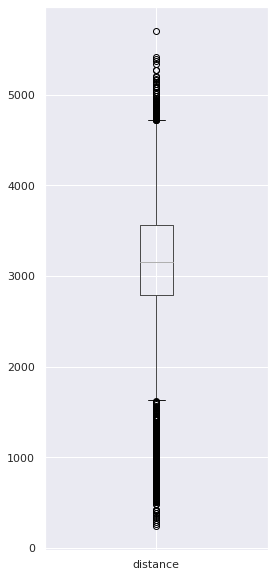

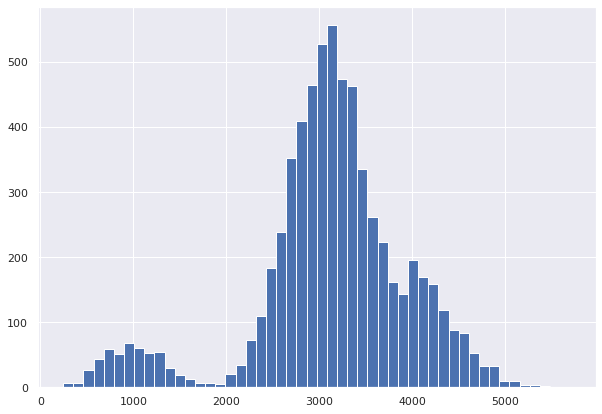

In [36]:
# посмотрим на расстояние для категории с подпиской
# построим график рахмаха и гистограмму
data_sub.boxplot(column='distance', grid=True, figsize=(4, 10))
plt.show()

data_sub['distance'].hist(bins=50)
plt.show()

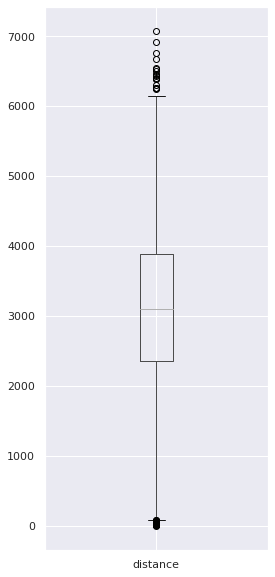

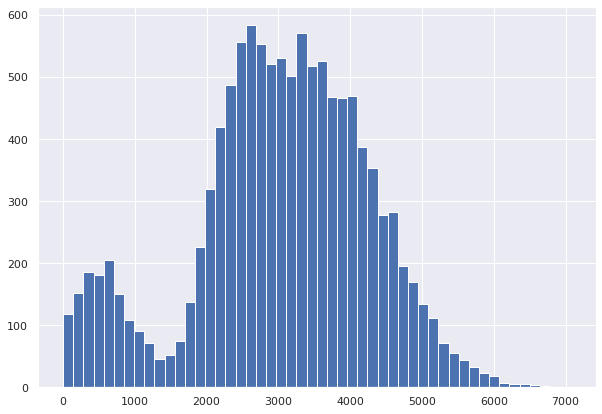

In [37]:
# далее построим те же графики, но для пользователей без подписки
data_free.boxplot(column='distance', grid=True, figsize=(4, 10))
plt.show()

data_free['distance'].hist(bins=50)
plt.show()

Судя по графикам, большинство пользователей с подпиской проезжают расстояние от 2500 м до 4200 м. Пик приходится на расстояние 3000-3100 м.

Без подписки пользователи совершают более длительные поездки - от 2000 м до 5000 м. Пик приходится на расстояние 2500-3800 м.

##### Длительность поездки для каждой категории

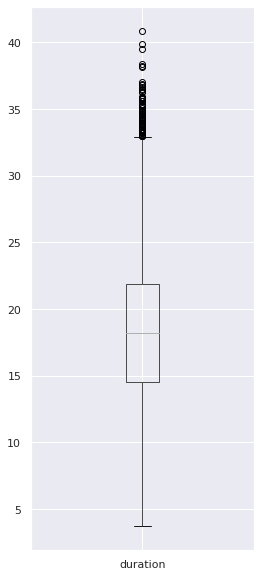

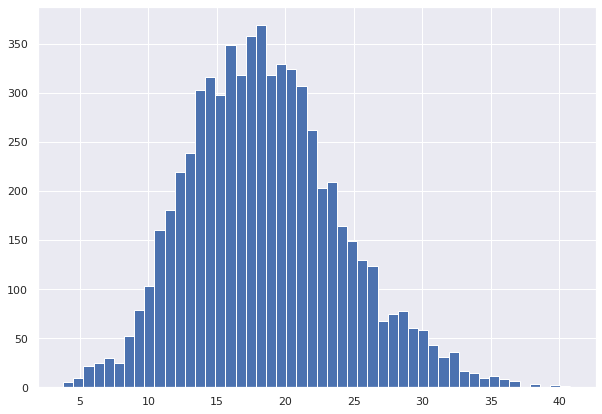

In [38]:
# построим график размаха и гистограмму для пользователей с подпиской
data_sub.boxplot(column='duration', grid=True, figsize=(4, 10))
plt.show()

data_sub['duration'].hist(bins=50)
plt.show()

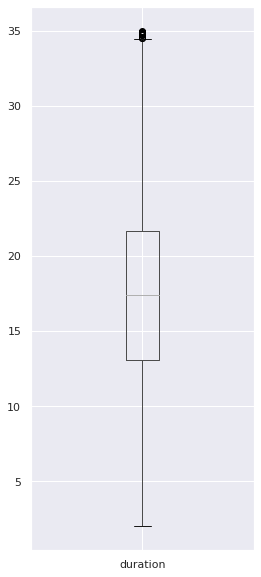

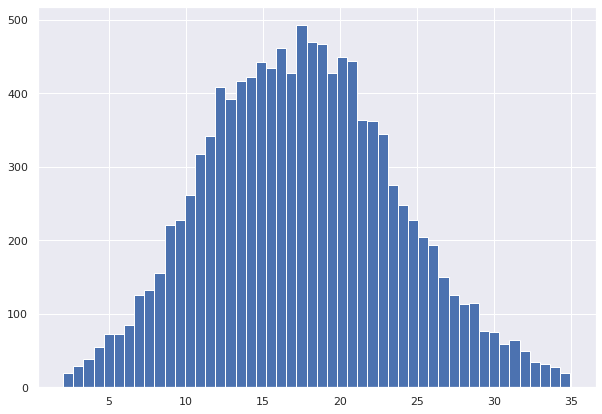

In [39]:
# то же самое построим для пользователей без подписки
data_free.boxplot(column='duration', grid=True, figsize=(4, 10))
plt.show()

data_free['duration'].hist(bins=50)
plt.show()

Пик времени для пользователей с подпиской приходится 13-21 минуту, большинство пользователей берут самокат как раз на этот период. Но есть и длительные поездки - более 30 минут.

Пик времени для пользователей без подписки приходится на 12-21 минуту. Большинство пользователей без подписки берут самокат в аренду на 10-25 минут. Поездки более 35 минут отсутствуют, по сравнению с пользователями с подпиской.

##### Вывод
В данном разделе были выполнены следующие задачи и сделаны следующие выводы:
- Было произведено объеденение данных в одну таблицу для более удобной работы. После объединения таблиц пропусков не появилось, все значения сохранились.
- Также данные были разделены на две таблицы: пользователи с подпиской и пользователи без подписки.
- Был проведен анализ и визуализация данных о длительности: большинство пользователей с подпиской совершают поездки расстоянием в 2500-4200 м и длительностью в 13-21 минуту. Пользователи без подписки совершают поездки расстоянием в 2000-5000 м и длительностью в 10-25 минуту.
- Можно заметить, что пользователи без подписки совершают более дальние поездки, а пользователи с подпиской - более длительные.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках

In [40]:
# так как деньги за минуту списываются после её начала, округлим длительность поездок до большего значения
data['duration'] = np.ceil(data['duration'])

In [41]:
agg_data = pd.pivot_table(data, index=['user_id', 'month'], \
                          values = ['distance', 'duration', 'name', 'subscription_type'], \
                          aggfunc = {'distance': sum, 'duration' : sum, 'name' : len, 'subscription_type' : max})


# переименуем столбец name на count_trips
agg_data = agg_data.rename(columns={'name' : 'count_trips'})

agg_data

distance  duration  count_trips subscription_type
user_id month                                                       
1       1       7027.511294      42.0            2             ultra
        4        754.159807       7.0            1             ultra
        8       6723.470560      46.0            2             ultra
        10      5809.911100      32.0            2             ultra
        11      7003.499363      56.0            3             ultra
...                     ...       ...          ...               ...
1534    6       3409.468534      26.0            2              free
        8       7622.453034      48.0            2              free
        9       4928.173852      23.0            1              free
        11     13350.015305      78.0            4              free
        12      2371.711192      16.0            1              free

[11300 rows x 4 columns]

##### Добавление столбца с месячной выручкой для каждого пользователя

In [42]:
# создадим функцию для подсчёта выручки по месяцам
def mv(df):
    if df['subscription_type'] == 'free':
        return 8 * df['duration'] + 50 * df['count_trips'] # для пользователей без подписки умножаем цену минуты поездки 
    else:                                                  # на длительность и прибавляем количество поездок умноженное на цену старта  
        return 6 * df['duration'] + 199                    # с подпиской: умножаем цену минуты на длительность плюс цена подписки

In [43]:
# добавим столбец monthly_revenue, применив функцю mv
agg_data['monthly_revenue'] = agg_data.apply(mv, axis='columns')

agg_data # проверим

distance  duration  count_trips subscription_type  \
user_id month                                                          
1       1       7027.511294      42.0            2             ultra   
        4        754.159807       7.0            1             ultra   
        8       6723.470560      46.0            2             ultra   
        10      5809.911100      32.0            2             ultra   
        11      7003.499363      56.0            3             ultra   
...                     ...       ...          ...               ...   
1534    6       3409.468534      26.0            2              free   
        8       7622.453034      48.0            2              free   
        9       4928.173852      23.0            1              free   
        11     13350.015305      78.0            4              free   
        12      2371.711192      16.0            1              free   

               monthly_revenue  
user_id month                   
1       1                451.0  
        4                241.0  
        8                475.0  
        10               391.0  
        11               535.0  
...                        ...  
1534    6                308.0  
        8                484.0  
        9                234.0  
        11               824.0  
        12               178.0  

[11300 rows x 5 columns]

##### Вывод
- Была создана таблица с агрегированными данными: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Был добавлен столбец с выручкой за каждый месяц у каждого пользователя.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки

Необходимо проверить гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- H0: Время подписчиков = время пользователей без подписки
- H1: Время подписчиков > время пользователей без подписки

Альтернативная гипотеза у нас правосторонняя.

Статистическу значимость (alpha) примем за 0.05 (5%)

Так как данных не слишком много, то будем брать генеральные совокупности, а не выборки.

In [44]:
# будем сравнивать две генеральные совокупности
sub = data_sub['duration'] # первая генеральная совокупность
free = data_free['duration'] # вторая генеральная совокупность

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sub, free, alternative='greater') # проводим ttest  с альтернативной правосторонней гипотезой (больше)

print('Pvalue равно:', results.pvalue)

# далее сравним pvalue с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


Pvalue равно: 4.704468074453899e-28
Отвергаем нулевую гипотезу


Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени на поездки. Соответственно, пользователи с подпиской могут быть "выгоднее" для компании.

##### Расстояние поездки в 3130 м

Следует проверить гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров.
- H0: Среднее расстояние пользователей по подписке = 3130
- H1: Среднее расстояние пользователей по подписке > 3130

Статистическу значимость (alpha) примем за 0.05 (5%)

In [45]:
sub_dist = data_sub['distance'] # генеральная выборка
opt_dist = 3130 # оптимальное расстояние

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(sub_dist, opt_dist, alternative='greater') # проводим ttest  с альтернативной левосторонней гипотезой (меньше)

print('Pvalue равно:', results.pvalue)

# далее сравним pvalue с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Pvalue равно: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Оснований отвергать нулевую гипотезу нет. Можно сказать, что среднее расстояние пользователей по подписке равно 3130 м. Соответственно, самокат не изнашивается раньше срока.

##### Помесячная выручка пользователей с подпиской и без

Необходимо проверить гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- H0: Помесячная выручка от пользователей с подпиской = помесяная выручка от пользователей без подписки
- H1: Помесячная выручка от пользователей с подпиской > помесяная выручка от пользователей без подписки

Статистическу значимость (alpha) примем за 0.05 (5%)

In [46]:
# будем сравнивать две генеральные совокупности
sub_r = agg_data.query('subscription_type == "ultra"')
free_r = agg_data.query('subscription_type == "free"')

sub_rev = sub_r['monthly_revenue'] # первая генеральная выборка
free_rev = free_r['monthly_revenue'] # вторая генеральная выборка

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sub_rev, free_rev, alternative='greater') # проводим ttest  с альтернативной правосторонней гипотезой (больше)

print('Pvalue равно:', results.pvalue)

# далее сравним pvalue с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Pvalue равно: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается. Есть основания полагать, что пользователи с подпиской  приносят больше выручки, чем пользователи без подписки.

##### Вопрос, связанный с обновлением сервера

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае гипотезы будут выглядеть следующим образом:
- H0: Количество обращений после обновления = количество обращений до обновление
- H1: Количество обращений после обновления != количество обращений до обновления

Для данной ситуации понадобился бы тест для проверки гипотезы о равенстве средних для зависимых (парных) выборок, так как мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения: st.ttest_rel (scipy.stats.ttest_rel())

##### Вывод
После проверки гипотез были сделаны следующие выводы:
- Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени на поездки. Соответственно, пользователи с подпиской могут быть "выгоднее" для компании.
- Среднее расстояние пользователей по подписке не превышает 3130 м. Соответственно, самокат не изнашивается раньше срока.
- Пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

#### Шаг 7. Распределения

##### Push-уведомления

Известно, что уведомления открывают около 40% получивших клиентов. 
Отдел планирует разослать 1 млн уведомлений. 
Следует оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

В данном случае необходимо биномиальное распределение аппроксимировать нормалным распределением.

В нашем случае n = 1 млн (количество экспериментов по схеме Бернулли) и p = 0.4 (вероятность успеха в каждом испытании).

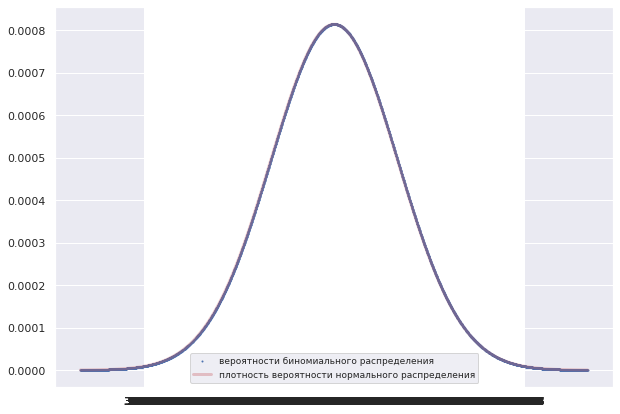

Условие выполняется


In [47]:
# зададим функцию, которая понадобится для визуализации нормального распределения
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

n = 1000000
p = 0.4

# посчитаем границы промежутка, в котором будем строить аппроксимацию
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

# зададим набор значений биномиальной величины на выбранном промежутке: все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))

# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=1, label='вероятности биномиального распределения')

# зададим параметры нормального распределения равными мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения: получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах 3 ст.отклонений от мат.ожидания
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)
ax.legend(loc='lower center', fontsize=9)
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

Для того, чтобы оценить вероятность того, что уведомление откроют не более 399,5 тыс пользователей, будем использовать функцию cdf().

In [48]:
distr = st.norm(mu, sigma) # задаем нормальное распределение

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(399500)
print(round(result,2))

0.15


Вероятность получить менее 399,5 тысяч кликов равна 15%, что довольно немало. Думаю, следует разослать больше уведомлений. 

##### Вывод

Вероятность получить менее 399,5 тыс кликов равна 15%, что по моему мнению достаточно много. Считаю, что отделу маркетинга следует разослать больше уведомлений, чтоб сократить вероятность невыполнения плана.

#### Шаг 8. Общий вывод

##### Выводы по пункту 1:
- Было произведена выгрузка данных, а именно 3-х таблиц.
- Был произведен просмотр основной информации о них.

##### Выводы по пункту 2:
- В данных пропуски отсутствуют.
- В таблице dt_users присутствовали дубликаты. Они были удалены.
- Аномальные значения в данных отсутствуют.
- Также к формату datetime был приведен столбец date из dt_rides и добавлен столбец month с номером месяца.

##### Выводы по пункту 3:
Проведя анализ данных, были сделаны следующие выводы:
- Наиболее часто встречающийся город среди пользователей - Пятигорск, наименее - Москва.
- Пользователей без подписки больше, их доля составляет 54%. Без подписки - 46%, соответственно.
- Самому младшему пользователю 12 лет, самому старшему - 43 года. Большинство клиентов имеют возраст от 19 до 29 лет.
- Самая короткая по расстоянию поездка - 0.86 м, самая длинная - более 7 км. Чаще всего на самокате за одну поездку проезжают 2500-3800 м.
- Самая длительная поездка - 40 минут, самая короткая - менее минуты. Чаще всего за одну поездку самокат находится в действии от 14 до 22 минут.
- Были удалены поездки, длительность которых меньше 1 минуты, так как после проверки было выявлено, что дальность таких поездов более 4000 м, что, конечно же, является ошибкой.

##### Выводы по пункту 4:

- Было произведено объеденение данных в одну таблицу для более удобной работы. Пропусков не появилось, все значения сохранились.
- Также данные были разделены на две таблицы: пользователи с подпиской и пользователи без подписки.
- Был проведен анализ и визуализация данных о длительности: большинство пользователей с подпиской совершают поездки расстоянием в 2500-4200 м и длительностью в 13-21 минуту. Пользователи без подписки совершают поездки расстоянием в 2000-5000 м и длительностью в 10-25 минуту.
- Можно заметить, что пользователи без подписки совершают более дальние поездки, а пользователи с подпиской - более длительные.

##### Выводы по пункту 5:
- Была создана таблица с агрегированными данными: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Был добавлен столбец с выручкой за каждый месяц у каждого пользователя.

##### Выводы по пункту 6:
В данном разделе были проверены следующие гипотезы:
- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

По итогам проверки данных гипотез были сделаны следующие выводы:
- Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени на поездки. Соответственно, пользователи с подпиской могут быть "выгоднее" для компании.
- Среднее расстояние пользователей по подписке равно 3130 м. Соответственно, самокат не изнашивается раньше срока.
- Пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

##### Выводы по пункту 7:
- Вероятность получить менее 399,5 тыс кликов равна 15%, что по моему мнению достаточно много. 
- Считаю, что отделу маркетинга следует разослать больше уведомлений, чтоб сократить вероятность невыполнения плана.

##### Заключение

Исходя из результатов исследования, делаю вывод, что пользователи с подпиской являются более выгодными, так как:
1. Было выявлено, что подписчики тратят в сервисе больше времени на поездки.
2. По результатам проверки гипотезы было выявлено, что пользователи с подпиской приносят больше выручки, без пользователи без подписки.

Считаю, что компании следует проводить акции для того, чтобы больше пользователей подключали подписку.